In [59]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math
from keras.utils import plot_model
import tensorflow_datasets as tfds

# Check the version of TensorFlow Decision Forests
print("Found TensorFlow Decision Forests v" + tfdf.__version__)
# Download the dataset
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O /tmp/penguins.csv

# Load a dataset into a Pandas Dataframe.
dataset_df = pd.read_csv("/tmp/penguins.csv")

# Display the first 3 examples.
dataset_df.head(3)
# Encode the categorical labels as integers.
#
# Details:
# This stage is necessary if your classification label is represented as a
# string since Keras expects integer classification labels.
# When using `pd_dataframe_to_tf_dataset` (see below), this step can be skipped.

# Name of the label column.
label = "species"

classes = dataset_df[label].unique().tolist()
print(f"Label classes: {classes}")

dataset_df[label] = dataset_df[label].map(classes.index)
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)


Found TensorFlow Decision Forests v1.7.0
Label classes: ['Adelie', 'Gentoo', 'Chinstrap']
239 examples in training, 105 examples for testing.


In [31]:
import tensorflow_datasets as tfds
# train_ds_pd = train_ds_pd.dropna(how='all', inplace=True)
train_ds_pd

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Torgersen,39.1,18.7,181.0,3750.0,male,2007
4,0,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,0,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,0,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,0,Torgersen,39.2,19.6,195.0,4675.0,male,2007
...,...,...,...,...,...,...,...,...
339,2,Dream,55.8,19.8,207.0,4000.0,male,2009
340,2,Dream,43.5,18.1,202.0,3400.0,female,2009
341,2,Dream,49.6,18.2,193.0,3775.0,male,2009
342,2,Dream,50.8,19.0,210.0,4100.0,male,2009


In [61]:
traisa = train_ds_pd[train_ds_pd.columns[2:4]]
traisa = traisa.assign(lb=train_ds_pd['species'])
testa = test_ds_pd[test_ds_pd.columns[2:4]]
testa = testa.assign(lb=test_ds_pd['species'])

In [62]:
testa

,bill_length_mm,bill_depth_mm,lb
0,39.1,18.7,0
1,39.5,17.4,0
2,40.3,18.0,0
4,36.7,19.3,0
5,39.3,20.6,0
...,...,...,...
329,50.7,19.7,2
333,49.3,19.9,2
337,46.8,16.5,2
338,45.7,17.0,2


In [33]:
traisa.shape

(228, 3)

In [63]:
traisa_X = traisa[traisa.columns[0:2]].to_numpy()
traisa_y = traisa['lb'].to_numpy()
testsa_X = testa[testa.columns[0:2]].to_numpy()
testsa_y = testa['lb'].to_numpy()
testsa_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
traisa_X.shape

(243, 2)

In [4]:
!set_cell_height 300

/bin/bash: set_cell_height: command not found


Use 12 thread(s) for training
Use /tmp/tmp0uqokby6 as temporary training directory


Epoch 1/100


6/6 [==============================] - 1s 39ms/step - loss: 7.2683 - accuracy: 0.5340 - val_loss: 30.8499 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 7.2683 - accuracy: 0.5340 - val_loss: 30.8499 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 7.2683 - accuracy: 0.5340 - val_loss: 30.8499 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 7.2683 - accuracy: 0.5340 - val_loss: 30.8499 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 7.2683 - accuracy: 0.5340 - val_loss: 30.8499 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 7.2683 - accuracy: 0.5340 - val_loss: 30.8499 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 7.2683 - accuracy: 0.5340 - val_loss: 30.8499 - val_accuracy: 0.0000e+

In [83]:
len(testsa_y)

105

4/4 [==============================] - 0s 3ms/step - loss: 9.8720 - accuracy: 0.5000


In [97]:
t = model_1.predict(testsa_X[-2])
t = np.argmax(t)
print(t)

1/1 [==============================] - 0s 70ms/step
0


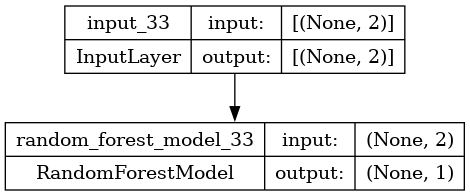

In [98]:
plot_model(model_1, to_file="/tmp/model.png", show_shapes=True)